# <center> Simulador da Copa do Mundo  

> Isenção de responsabilidade 1: Por favor, não use isso para fins de apostas. Este é apenas um experimento matemático feito por um cientista de dados. Não sou um apostador e não quero dar sugestões sobre suas apostas. <p>
> Isenção de responsabilidade 2: Este projeto não está relacionado de forma alguma a todos os eventos do Catar que estão acontecendo atualmente e não é patrocinador ou anti-patrocinador da Copa do Mundo da FIFA 2022 no Catar. <p> <br>
    
Então deixe-me dizer, em poucas palavras, o que você verá aqui:

1. Construiremos algum tipo de função de probabilidade para os resultados das partidas;
2. Faremos uma simulação com base nas probabilidades que extraímos~;
3. Executaremos a simulação várias vezes e extrairemos algumas estatísticas.    

# 1. Primeiros Passos
Vamos importar algumas bibliotecas primeiro:

In [221]:
import numpy             as np
import pandas            as pd 
import matplotlib.pyplot as plt 
import seaborn           as sns

In [ ]:
def jupyter_setting():
    
        %matplotlib inline

        #os.environ["WANDB_SILENT"] = "true" 
        #plt.style.use('bmh') 
        #plt.rcParams['figure.figsize'] = [20,15]
        #plt.rcParams['font.size']      = 13

        matplotlib_axes_logger.setLevel('ERROR')

        pd.options.display.max_columns = None
        #pd.set_option('display.expand_frame_repr', False)

        warnings.filterwarnings(action='ignore')
        warnings.simplefilter('ignore')
        warnings.filterwarnings('ignore')
        warnings.filterwarnings('ignore', category=DeprecationWarning)
        warnings.filterwarnings('ignore', category=FutureWarning)
        warnings.filterwarnings('ignore', category=RuntimeWarning)
        warnings.filterwarnings('ignore', category=UserWarning)
        warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)
        warnings.filterwarnings("ignore", category= sklearn.exceptions.UndefinedMetricWarning)
        warnings.simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

        pd.options.mode.chained_assignment = None 
        pd.set_option('display.max_rows', 200)
        pd.set_option('display.max_columns', 500)
        pd.set_option('display.max_colwidth', 200)

        icecream = ["#00008b", "#960018","#008b00", "#00468b", "#8b4500", "#582c00"]
        #sns.palplot(sns.color_palette(icecream))

        colors = ["lightcoral", "sandybrown", "darkorange", "mediumseagreen",
              "lightseagreen", "cornflowerblue", "mediumpurple", "palevioletred",
              "lightskyblue", "sandybrown", "yellowgreen", "indianred",
              "lightsteelblue", "mediumorchid", "deepskyblue"]

        # Colors
        dark_red   = "#b20710"
        black      = "#221f1f"
        green      = "#009473"
        myred      = '#CD5C5C'
        myblue     = '#6495ED'
        mygreen    = '#90EE90'    
        color_cols = [myred, myblue,mygreen]
        
        plt.style.use('ggplot')
        plt.rcParams['font.family'] = 'sans-serif' 
        plt.rcParams['font.serif'] = 'Ubuntu' 
        plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
        plt.rcParams['font.size'] = 14 
        plt.rcParams['axes.labelsize'] = 12 
        plt.rcParams['axes.labelweight'] = 'bold' 
        plt.rcParams['axes.titlesize'] = 12 
        plt.rcParams['xtick.labelsize'] = 12 
        plt.rcParams['ytick.labelsize'] = 12 
        plt.rcParams['legend.fontsize'] = 12 
        plt.rcParams['figure.titlesize'] = 12 
        plt.rcParams['image.cmap'] = 'jet' 
        plt.rcParams['image.interpolation'] = 'none' 
        plt.rcParams['figure.figsize'] = (12, 10) 
        plt.rcParams['axes.grid']=True
        plt.rcParams['lines.linewidth'] = 2 
        plt.rcParams['lines.markersize'] = 8
        colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 
                  'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 
                  'xkcd:cadet blue','xkcd:scarlet']


        return icecream, colors, color_cols 

In [ ]:
icecream, colors, color_cols = jupyter_setting()

# 2. Importa dados 

O conjunto de dados que usei é um conjunto de dados das partidas e o número de vezes que uma seleção nacional venceu ou passou da fase de grupos, como veremos.


In [172]:
data_matches  = pd.read_csv('Data/WorldCupMatches.csv')
data_winner   = pd.read_csv('Data/WorldCups.csv')
data_players  = pd.read_csv('Data/WorldCupPlayers.csv')

In [173]:
data_matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [174]:
data_winner.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [175]:
data_players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


# 3. EDA


Agora deixe-me fazer algumas explorações. Vamos começar com o óbvio e ver quantas vezes cada seleção já venceu a Copa do Mundo antes:


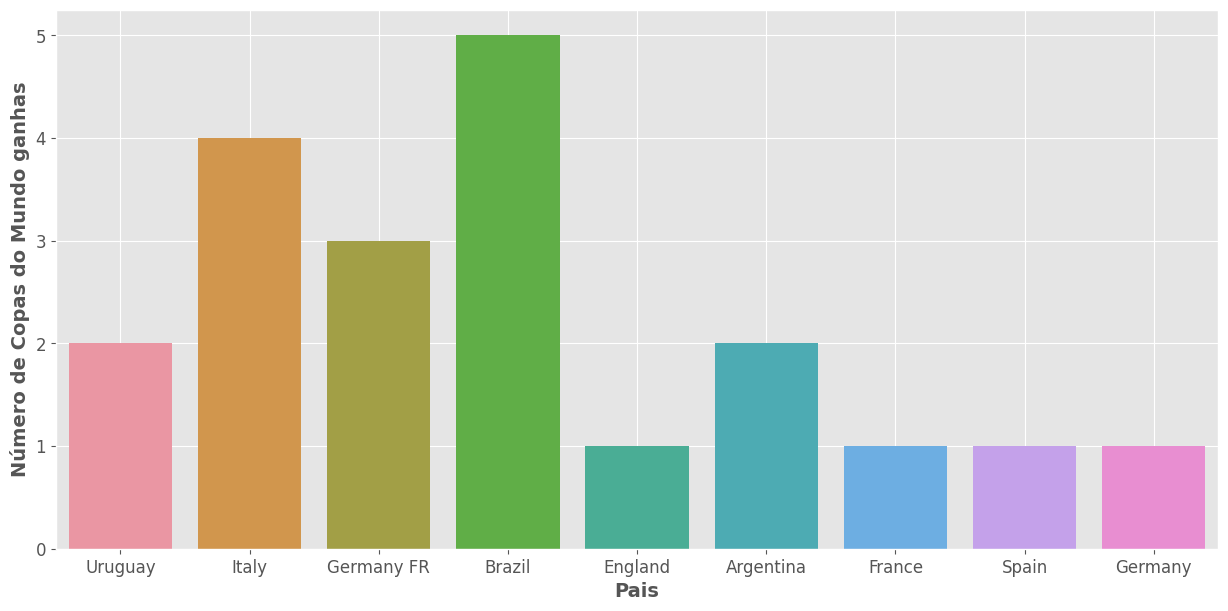

In [176]:
plt.figure(figsize=(15,7))
sns.countplot(data=data_winner, x='Winner')
plt.grid(True)

plt.ylabel('Número de Copas do Mundo ganhas',fontsize=14)
plt.xlabel('Pais',fontsize=14);

O Brasil venceu 5, a Itália venceu 4 e a Argentina venceu 2 duas.

Outra coisa bacana que podemos explorar está relacionada ao fato de que, no dataset das partidas, temos também a fase do torneio. É interessante explorá-lo porque o número de vezes que um país passou da fase de grupos é obviamente um indicativo da qualidade daquela seleção.

Vamos dar uma olhada:

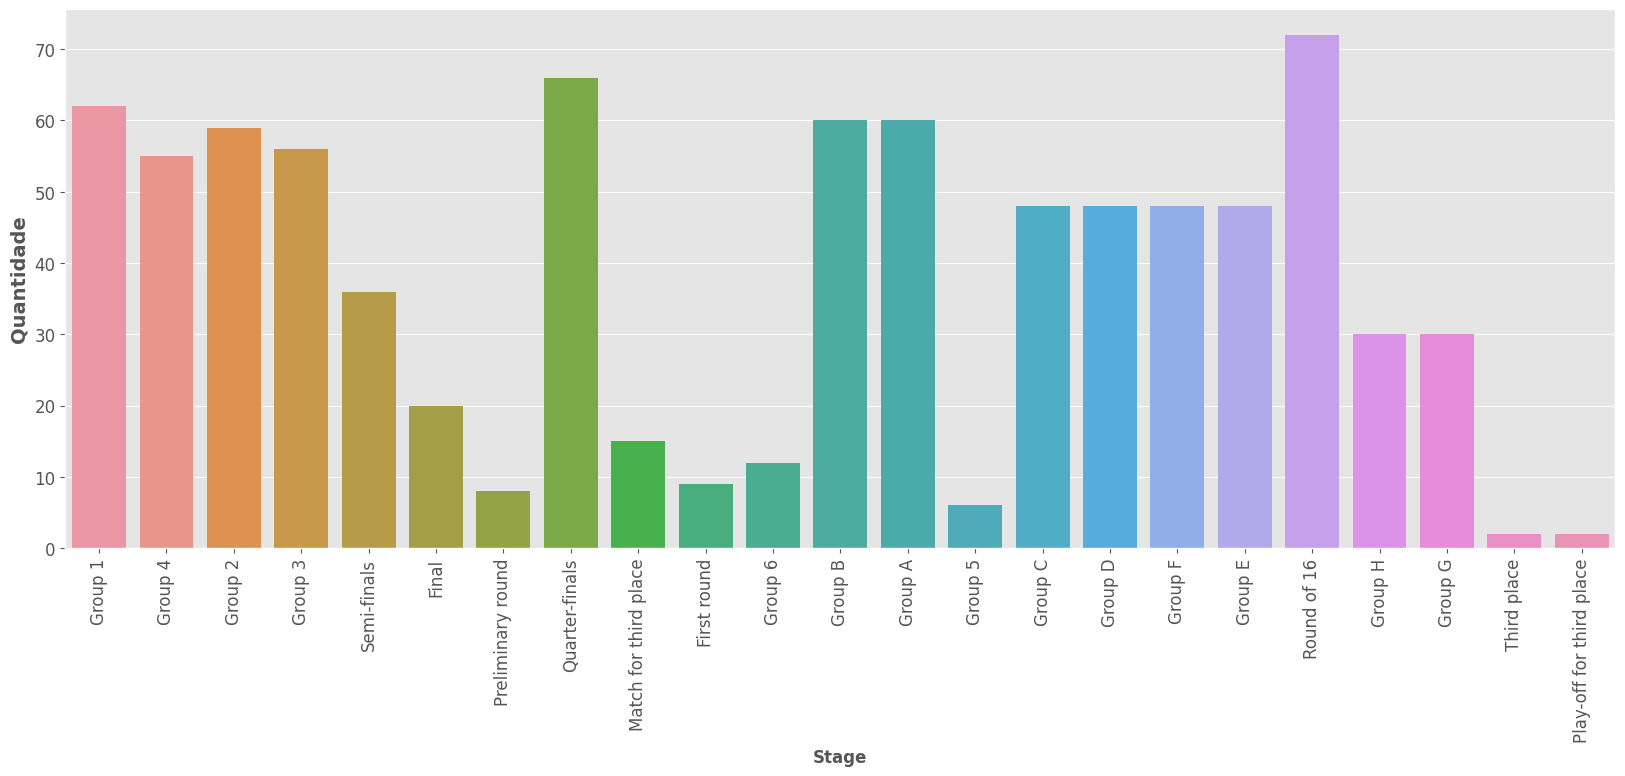

In [180]:
plt.figure(figsize=(20,7))
sns.countplot(data=data_matches,  x='Stage')
plt.ylabel('Quantidade',fontsize=14)
plt.xticks(rotation=90);

Portanto, temos muitos jogos da fase de grupos, mas apenas algumas eliminatórias. Isso faz todo o sentido porque, claro, você tem vários grupos, mas apenas uma fase eliminatória.

# 3. Modelando a Distribuição de Probabilidade
Agora que a parte chata está feita, vamos aos detalhes de como vamos simular esta Copa do Mundo.

Temos nossas equipes e suas partidas. Digamos que você tenha o Time 1 (T_1) e o Time 2 (T_2). Qual é a probabilidade de que o Time 1 vença a partida? <p> <br>

# <center> $ P(T1 \; vencendo\; T2)= \frac{número \;de\; vezes\; que\; T1\; venceu\; contra\;T2}{número \;de\; correspondências\; entre \;T1\; e \;T2} $ </center>
    
    

Sobre o empate: claro, duas equipes podem empatar na fase de grupos, mas não podem empatar na fase eliminatória. Eu vou te dizer como lidar com isso mais tarde.

# <center> $ P(T1\;vencedor) = \frac{número\;de\;vezes\;que\;T1\;venceu}{número\;de\;jogos\;de\;T1} $ </center>
    

É claro que é o mesmo para empatar ou perder.
    
Para isso, precisamos da seguinte coluna para as partidas, que chamamos de "Result":
    

In [251]:
filtro_2 = data_matches['Home Team Goals']>data_matches['Away Team Goals']
filtro_3 = data_matches['Home Team Goals']<data_matches['Away Team Goals']

data_matches['Result']           = 'Draw'
data_matches['Result'][filtro_2] = data_matches[filtro_2]['Home Team Name']
data_matches['Result'][filtro_3] = data_matches[filtro_3]['Away Team Name']

C:\Users\root\AppData\Local\Temp\ipykernel_139216\87140611.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_matches['Result'][filtro_2] = data_matches[filtro_2]['Home Team Name']
C:\Users\root\AppData\Local\Temp\ipykernel_139216\87140611.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_matches['Result'][filtro_3] = data_matches[filtro_3]['Away Team Name']


In [252]:
data_matches['Result'] .unique()

array(['France', 'USA', 'Yugoslavia', 'Romania', 'Argentina', 'Chile',
       'Uruguay', 'Brazil', 'Paraguay', 'Austria', 'Hungary',
       'Switzerland', 'Sweden', 'Germany', 'Spain', 'Italy',
       'Czechoslovakia', 'Draw', 'Cuba', 'England', 'Germany FR',
       'Turkey', 'Northern Ireland', 'Soviet Union', 'Wales', 'Mexico',
       'Portugal', 'Korea DPR', 'Peru', 'Belgium', 'German DR',
       'Scotland', 'Netherlands', 'Poland', 'Tunisia', 'Algeria',
       'Denmark', 'Morocco', 'Cameroon', 'Colombia', 'Costa Rica',
       'rn">Republic of Ireland', 'Norway', 'Nigeria', 'Saudi Arabia',
       'Bulgaria', 'Russia', 'Croatia', 'Iran', 'Jamaica', 'Senegal',
       'Korea Republic', 'South Africa', 'Japan', 'Ecuador', 'Australia',
       'Czech Republic', 'Ghana', 'Ukraine', "C�te d'Ivoire", 'Slovenia',
       'Greece', 'Serbia', 'Slovakia', 'rn">Bosnia and Herzegovina'],
      dtype=object)

Agora temos que selecionar o time para a Copa do Mundo do Catar. Não dá muito trabalho e podemos simplesmente copiar e colar do site. Eu fiz isso por você.

In [227]:
qatar_team_list = ["Argentina",
"Australia",
"Belgium",
"Brazil" ,
"Cameroon", 
"Canada" ,
"Costa Rica", 
"Croatia" ,
"Denmark" ,
"Ecuador" ,
"England" ,
"France" ,
"Germany" ,
"Ghana" ,
"IR Iran",
"Japan" ,
"Korea Republic",
"Mexico",
"Morocco", 
"Netherlands",
"Poland",
"Portugal",
"Qatar",
"Saudi Arabia",
"Senegal",
"Serbia",
"Spain",
"Switzerland",
"Tunisia",
"Uruguay",
"USA",
"Wales"]

Agora temos que combinar os dados que temos com a lista da equipe. Temos que ter certeza de que temos todas as equipes que estarão no Catar no conjunto de dados.

In [228]:
team_list = list(set(data_matches['Home Team Name']))
for t in qatar_team_list:
    if t not in team_list:
        print('Houston, we have a problem with team %s'%(t))
qatar_probabilities = {'Win':0.20,'Draw':0.20,'Lose':0.60}

Houston, we have a problem with team Qatar


Então, ironicamente, o Catar é o único time que não temos em nosso conjunto de dados. Trataremos disso mais tarde. Vamos adicionar um dicionário qatar_probabilities por enquanto, que é uma espécie de probabilidade realista inventada de quantos jogos o Qatar pode realmente vencer na Copa do Mundo.

Agora, se quisermos fazer a conversão de probabilidade, vamos usar a seguinte função:

In [234]:
def select_team_statistics(team):    
    data_team     = data_matches[(data_matches['Home Team Name']==team)| (data_matches['Away Team Name']==team)]
    winning_count = len(data_team[data_team['Result']==team])
    draw_count    = len(data_team[data_team['Result']=='Draw'])
    lose_count    = len(data_team)-winning_count-draw_count
    
    return data_team,{'Vitórias':winning_count,'Empate':draw_count,'Derrota':lose_count}

E vamos traçar alguns resultados aleatórios:

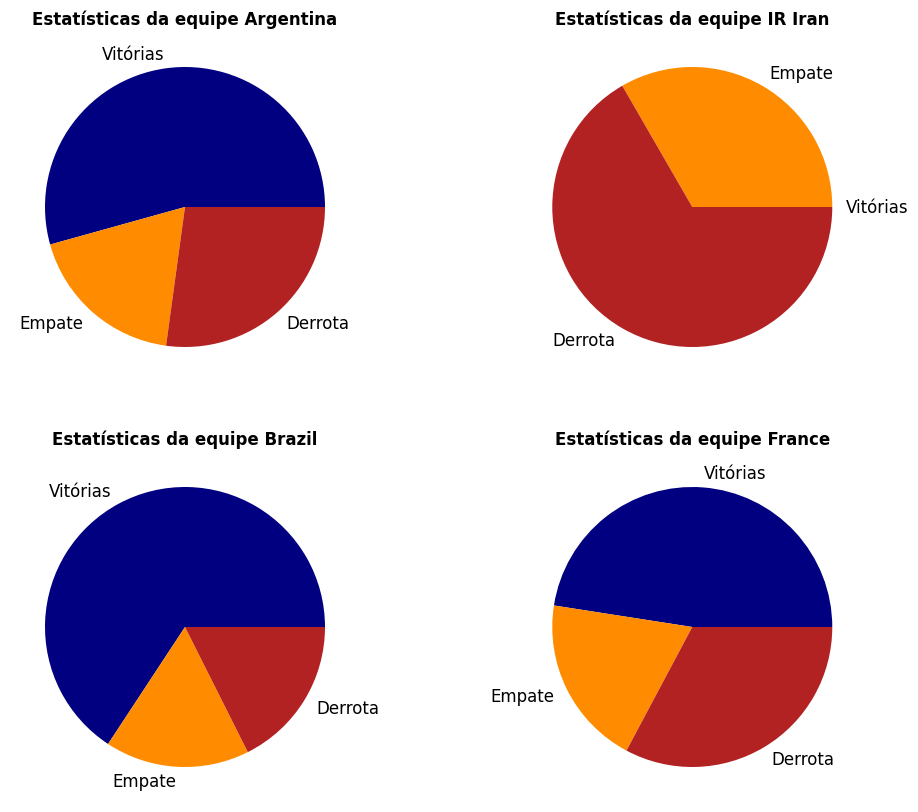

In [250]:
for i in range(1,5):
    plt.subplot(2,2,i)
    random_team = np.random.choice(qatar_team_list)
    plt.title('Estatísticas da equipe %s'%(random_team),fontweight='bold')
    team_data,stats = select_team_statistics(random_team)
    labels, values = stats.keys(),stats.values()
    plt.pie(values, labels = labels,colors=['navy','darkorange','firebrick'])

Agora, tudo bem, mas precisamos fazer a probabilidade para as partidas , não apenas para times individuais. Estamos aplicando a regra acima da seguinte maneira:

In [257]:
def select_match_statistics(team_A, team_B):
    
    filtro_1 = (data_matches['Home Team Name']==team_A) & (data_matches['Away Team Name']==team_B)
    filtro_2 = (data_matches['Home Team Name']==team_B) & (data_matches['Away Team Name']==team_A)
    
    data_team = data_matches[filtro_1 | filtro_2]
    len_data = len(data_team)
    
    if len_data==0:
        msg = 'Esses times nunca jogaram um contra o outro'
    else:
        msg = 'Estas equipes se enfrentaram %i vezes'%(len_data)
    
    print(msg)
    
    team_A_win = len(data_team[data_team.Result==team_A])
    team_B_win = len(data_team[data_team.Result==team_B])
    draw = len(data_team[data_team.Result=='Draw'])
    
    return data_team,{team_A:team_A_win,team_B:team_B_win,'Draw':draw}

Agora, essa probabilidade só funciona se as duas partidas tiverem um histórico de partidas. Isso, por exemplo, funciona com Brasil e Argentina:

In [258]:
data_match, stats = select_match_statistics('Brazil','Argentina')

Estas equipes se enfrentaram 4 vezes


Mas o que vamos fazer neste caso?

In [260]:
data_match,stats = select_match_statistics('France','Qatar')

Esses times nunca jogaram um contra o outro


Esta é uma pergunta real. Não tenho a resposta porque é difícil prever automaticamente o resultado de duas equipes que nunca se enfrentaram. O que podemos fazer é construir uma pontuação para cada vez e comparar as duas pontuações para convertê-las em uma probabilidade de vitória do Time 1, vitória do Time 2 ou empate dos dois times.

Acho que uma boa pontuação para um time é o número (normalizado) de vezes que o time passou da fase de grupos. Este é, obviamente, um bom ponto que indica a qualidade de uma equipe. Vamos chamá-lo de 1. Outra coisa importante a considerar é o número de vezes que um time realmente ganhou a Copa do Mundo, vamos chamá-lo de pontuação 2. Como score_1 está entre 0 e 1 e score_2 pode ser 2, 3 ou 4, vamos multiplicá-lo por 0,5. Assim, dada uma equipe T, teremos:


# <center> $ S(Tx)= S1(Tx) + \frac{S2(Tx)}{2}  $ </center>


Portanto, se tivermos duas equipes, T_x1 e T_x2, e definirmos a probabilidade de T_x1 vencer como P(T_x1, T_x2), podemos dizer que:

# <center> $ P(Tx1,Tx2)= \frac{S(Tx1)}{S(Tx1)\;+\;S(Tx2)}  $ </center>

e: 


# <center> $ P(Tx2,Tx1)= \frac{S(Tx2)}{S(Tx1)\;+\;S(Tx2)}  $ </center>


Mas esta definição de probabilidade não nos permite desenhar. Então, preferimos dizer que a probabilidade de empate entre duas equipes que nunca jogaram uma partida é fixa, digamos em 0.10,  diremos então que:


# <center> $ P(Tx1,Tx2)= \frac{S(Tx1)}{S(Tx1)\;+\;S(Tx2)}\;-\;0.05   $ </center>

# <center> $ P(Tx2,Tx1)= \frac{S(Tx2)}{S(Tx1)\;+\;S(Tx2)}\;-\;0.05   $ </center>


E a probabilidade deles empatarem é: 

# <center> $ Pe(Tx1,Tx2)= 0.10   $ </center>


## 1. Função para obter a pontuação de uma equipe

In [267]:
def find_score(team):
    
    team_data, stats = select_team_statistics(team)
    team_stage = team_data['Stage'].reset_index().drop('index',axis=1)
    sum_groups = 0
    sum_finals = 0
    
    for s in range(len(team_stage)):
        stage_val = team_stage.loc[s].values[0].split(' ')
        if stage_val[0]=='Group':
            sum_groups = sum_groups + 1
        if stage_val[0]!='Group':
            sum_finals = sum_finals + 1
    
    score_1 = sum_finals/(sum_groups+sum_finals)
    
    try:
        score_2 = 0.5*data_winner.value_counts(subset='Winner')[team]
    except:
        score_2=0
        
    return score_1+score_2

In [268]:
find_score('Brazil')

2.9166666666666665

## 2. Função para converter as pontuações de duas equipes em uma probabilidade

In [269]:
def find_score_two_teams(team_A,team_B):
    
    if team_A == 'Qatar':
        score_1 = 0.09
        score_2 = find_score(team_B)
    
    if team_B == 'Qatar':
        score_2 = 0.09
        score_1 = find_score(team_A)
    
    if team_A!='Qatar' and team_B!='Qatar':
        score_1 = find_score(team_A)
        score_2 = find_score(team_B)
    
    team_A_score = score_1/(score_1+score_2)
    team_B_score = score_2/(score_1+score_2)
    
    if team_A_score>team_B_score:
        team_A_score = min(0.90,team_A_score)
        team_B_score = max(0.10,team_B_score)
    else:
        team_B_score = min(0.90,team_B_score)
        team_A_score = max(0.10,team_A_score)
    
    team_A_score = team_A_score-0.05
    team_B_score = team_B_score-0.05
    res = {team_A: team_A_score, team_B:team_B_score, 'Draw':0.10}
    
    return res

> *Como podemos ver, a pontuação do Catar é de 0,09. Eu consegui isso no primeiro quartil de 0,25 de toda a distribuição de pontuação 1. Este é um valor razoavelmente (baixo) para um time que nunca disputou uma Copa do Mundo.

## 3. Função para extrair as probabilidades dos resultados entre duas equipes

In [277]:
def select_match_statistics(team_A, team_B):
    
    filter_1  = (data_matches['Home Team Name']==team_A) & (data_matches['Away Team Name']==team_B)
    filter_2  = (data_matches['Home Team Name']==team_B) & (data_matches['Away Team Name']==team_A)
    data_team = data_matches[filter_1 | filter_2]    
    len_data  = len(data_team)
    
    if len_data==0:
        #print('These teams never played against each other')
        res = find_score_two_teams(team_A,team_B)
    else:
        #print('These teams played against each other %i times'%(len_data))
        team_A_win = len(data_team[data_team.Result==team_A])/len_data
        team_B_win = len(data_team[data_team.Result==team_B])/len_data
        draw = len(data_team[data_team.Result=='Draw'])/len_data
        res_list = [team_A_win,team_B_win,draw]
        cond = 0
        for i in range(len(res_list)):
            if res_list[i]==1.0:
                res_list[i] = 0.80
                k=i
                cond = 1
                break
        if cond==1:
            for i in range(len(res_list)):
                if i!=k:
                    res_list[i]=0.10

        res = {team_A:res_list[0],team_B:res_list[1],'Draw':res_list[2]}
    return data_team,res

In [294]:
_,stats_1 = select_match_statistics('Saudi Arabia','Portugal')
_,stats_2 = select_match_statistics('Brazil', 'Germany')

In [295]:
stats_1

{'Saudi Arabia': 0.15000000000000002, 'Portugal': 0.75, 'Draw': 0.1}

In [296]:
stats_2

{'Brazil': 0.3333333333333333, 'Germany': 0.6666666666666666, 'Draw': 0.0}

> *Também me certifiquei de que não é possível que um time tenha 100% de probabilidade de vencer outro somando alguma (pequena) probabilidade de perder e empatar

## 3. A DIVERSÃO!
Agora é hora de fazer nosso modelo rodar. Temos que construir os grupos exatos para a Copa do Mundo do Catar. Faremos esse grupo rodar e um time vencerá, empatará ou perderá com base na probabilidade que construímos.

Também construiremos a etapa de eliminação algorítmica (primeira equipe do Grupo A x segunda equipe do Grupo B, primeira equipe do Grupo B x segunda equipe do Grupo A).

Executaremos esse algoritmo várias vezes e escolheremos o vencedor.

Deixe-me fazer isso passo a passo. Vamos definir os grupos:

In [297]:
group_A = ['Qatar','Ecuador','Senegal','Netherlands']
group_B = ['England','IR Iran','USA','Wales']
group_C = ['Argentina','Saudi Arabia','Mexico','Poland']
group_D = ['France','Australia','Denmark','Tunisia']
group_E = ['Spain','Costa Rica','Germany','Japan']
group_F = ['Belgium','Canada','Morocco','Croatia']
group_G = ['Brazil','Serbia','Switzerland','Cameroon']
group_H = ['Portugal','Ghana','Uruguay','Korea Republic']

In [298]:
groups = [group_A,group_B,group_C,group_D,group_E,group_F,group_G,group_H]

por exemplo, a probabilidade para o grupo B:

In [300]:
group_name = group_B
for team_1 in group_name:
    for team_2 in group_name:
        if team_1!=team_2:
            _,stats = select_match_statistics(team_1,team_2)
            if sum(stats.values())==0:
                print(stats)
                print('Como fazemos isso? :(')
            else:
                print(stats)

{'England': 0.85, 'IR Iran': 0.05, 'Draw': 0.1}
{'England': 0.0, 'USA': 0.5, 'Draw': 0.5}
{'England': 0.7480456026058632, 'Wales': 0.15195439739413685, 'Draw': 0.1}
{'IR Iran': 0.05, 'England': 0.85, 'Draw': 0.1}
{'IR Iran': 0.05, 'USA': 0.85, 'Draw': 0.1}
{'IR Iran': 0.05, 'Wales': 0.85, 'Draw': 0.1}
{'USA': 0.5, 'England': 0.0, 'Draw': 0.5}
{'USA': 0.85, 'IR Iran': 0.05, 'Draw': 0.1}
{'USA': 0.4905405405405406, 'Wales': 0.4094594594594595, 'Draw': 0.1}
{'Wales': 0.15195439739413685, 'England': 0.7480456026058632, 'Draw': 0.1}
{'Wales': 0.85, 'IR Iran': 0.05, 'Draw': 0.1}
{'Wales': 0.4094594594594595, 'USA': 0.4905405405405406, 'Draw': 0.1}


Com base nessas probabilidades, podemos fazer a simulação da seguinte forma: Isso é para um determinado grupo:

In [301]:
def run_group(group_name):
    data_res = pd.DataFrame(np.zeros(len(group_name)).T,index= group_name,columns=['Points'])
    for team_1 in group_name:
        for team_2 in group_name:
            if team_1!=team_2:
                _,stats = select_match_statistics(team_1,team_2)
                result = np.random.choice(list(stats.keys()),p=list(stats.values()))
                try:
                    data_res['Points'].loc[result]=data_res['Points'].loc[result]+3
                except:
                    data_res['Points'].loc[team_1]=data_res['Points'].loc[team_1]+1
                    data_res['Points'].loc[team_2]=data_res['Points'].loc[team_2]+1
    return data_res.sort_values(by='Points',ascending=False)

In [303]:
group_names = ['group A','group B','group C','group D','group E','group F','group G','group H']
def run_groups():
    group_list =[]
    for g in range(len(groups)):
        g_group = run_group(groups[g])
        g_group = g_group.rename(columns={'Points':'Points '+group_names[g]})
        group_list.append(g_group)
    return group_list    

Vamos fazer as simulações para os grupos:

In [305]:
group_list = run_groups()

In [307]:
group_list[0]

,Points group A
Senegal,12.0
Netherlands,11.0
Qatar,8.0
Ecuador,2.0


In [308]:
group_list

[             Points group A
 Senegal                12.0
 Netherlands            11.0
 Qatar                   8.0
 Ecuador                 2.0,
          Points group B
 England            13.0
 Wales              12.0
 USA                10.0
 IR Iran             0.0,
               Points group C
 Argentina               13.0
 Poland                  10.0
 Mexico                   7.0
 Saudi Arabia             4.0,
            Points group D
 France               18.0
 Denmark              12.0
 Australia             3.0
 Tunisia               3.0,
             Points group E
 Spain                 15.0
 Germany                9.0
 Costa Rica             7.0
 Japan                  4.0,
          Points group F
 Belgium            15.0
 Croatia            13.0
 Morocco             5.0
 Canada              1.0,
              Points group G
 Brazil                 14.0
 Switzerland            11.0
 Cameroon                9.0
 Serbia                  0.0,
                 Points grou

Não sei você, mas acho que esses resultados são bem realistas.

Vamos continuar!

Dos grupos, esta é a fase eliminatória:

In [309]:
def find_qualification_stage(res_groups):
    qual_matches = []
    group_stage = np.arange(0,len(groups),2)
    k=0
    for g in range(len(group_stage)):
        qual_matches.append([res_groups[k].index[0],res_groups[k+1].index[1]])
        qual_matches.append([res_groups[k].index[1],res_groups[k+1].index[0]])
        k=k+2
    return qual_matches

In [310]:
def elimination_stage(selections,k=1):
    quarter_finals_team = []
    for i in range(len(selections)):
        team_1 = selections[i][0]
        team_2 = selections[i][1]
        _,stats = select_match_statistics(team_1,team_2)
        result = np.random.choice(list(stats.keys()),p=list(stats.values()))    
        if result=='Draw':
            result = np.random.choice([team_1,team_2],p=[0.5,0.5])
        quarter_finals_team.append(result)
    if k ==1: 
        quarter_finals_team=np.array(quarter_finals_team).reshape(2,-1)
    return quarter_finals_team

E esta é toda a simulação do torneio:

In [311]:
def whole_tournament():
    group_stage = run_groups()
    first_selection = find_qualification_stage(group_stage)
    quarter_finals = elimination_stage(first_selection)
    semi_finals = elimination_stage(quarter_finals,k=0)
    _,stats = select_match_statistics(semi_finals[0],semi_finals[1])
    winner = np.random.choice(list(stats.keys()),p=list(stats.values())) 
    if winner=='Draw':
        winner = np.random.choice([semi_finals[0],semi_finals[1]],p=[0.5,0.5])
    return winner

Este é um exemplo de toda a simulação do torneio:

In [312]:
group_stage = run_groups()
first_selection = find_qualification_stage(group_stage)
print(first_selection)
quarter_finals = elimination_stage(first_selection)
print(quarter_finals)
semi_finals = elimination_stage(quarter_finals,k=0)
print(semi_finals)
_,stats = select_match_statistics(semi_finals[0],semi_finals[1])
winner = np.random.choice(list(stats.keys()),p=list(stats.values())) 
print(winner)

if winner=='Draw':
    winner = np.random.choice([semi_finals[0],semi_finals[1]],p=[0.5,0.5])

[['Ecuador', 'England'], ['Senegal', 'Wales'], ['Argentina', 'Australia'], ['Mexico', 'Denmark'], ['Germany', 'Belgium'], ['Japan', 'Croatia'], ['Brazil', 'Uruguay'], ['Switzerland', 'Korea Republic']]
[['England' 'Senegal' 'Argentina' 'Denmark']
 ['Germany' 'Croatia' 'Uruguay' 'Korea Republic']]
['England', 'Croatia']
Croatia


E podemos executar isso 10.000 vezes:

In [ ]:
stats = []
for i in range(10000):
    if (i%100)==0 and i>0:
        print('Número da simulação em execução %i' %(i))
        so_far = pd.DataFrame(stats).value_counts().index[0][0]
        print('O vencedor mais previsto até agora é %s'%(so_far))
    winner = whole_tournament()
    stats.append(winner)

Número da simulação em execução 100
O vencedor mais previsto até agora é Spain
Número da simulação em execução 200
O vencedor mais previsto até agora é Spain
Número da simulação em execução 300
O vencedor mais previsto até agora é Spain
Número da simulação em execução 400
O vencedor mais previsto até agora é Spain
Número da simulação em execução 500
O vencedor mais previsto até agora é Spain
Número da simulação em execução 600
O vencedor mais previsto até agora é Spain
Número da simulação em execução 700
O vencedor mais previsto até agora é Spain
Número da simulação em execução 800
O vencedor mais previsto até agora é Spain
Número da simulação em execução 900
O vencedor mais previsto até agora é Spain
Número da simulação em execução 1000
O vencedor mais previsto até agora é Spain
Número da simulação em execução 1100
O vencedor mais previsto até agora é Spain
Número da simulação em execução 1200
O vencedor mais previsto até agora é Spain
Número da simulação em execução 1300
O vencedor m

A seguir estão as estatísticas do vencedor:

In [ ]:
pd.DataFrame(stats)[0].value_counts().plot(kind="bar");

Alguns deles são surpreendentes (Senegal, Costa Rica, Equador…, Brasil e Argentina não incluídos), alguns deles são bastante confiáveis ​​(Espanha, Alemanha, Inglaterra)

Podemos alterar ligeiramente a função para determinar o vencedor e o vice-campeão.

In [ ]:
def whole_tournament():
    group_stage = run_groups()
    first_selection = find_qualification_stage(group_stage)
    quarter_finals = elimination_stage(first_selection)
    semi_finals = elimination_stage(quarter_finals,k=0)
    _,stats = select_match_statistics(semi_finals[0],semi_finals[1])
    winner = np.random.choice(list(stats.keys()),p=list(stats.values())) 
    if winner=='Draw':
        winner = np.random.choice([semi_finals[0],semi_finals[1]],p=[0.5,0.5])
    second = [s for s in semi_finals if s!=winner]
    return winner,second[0]

In [ ]:
stats = np.array(stats)

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Estatísticas do vencedor',fontsize=20)
pd.DataFrame(stats[:,0])[0].value_counts().plot(kind="bar");

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Estatísticas da segunda equipe',fontsize=20)
pd.DataFrame(stats[:,1])[0].value_counts().plot(kind="bar");

Isso é realmente muito emocionante e podemos concluir muitas coisas. A Holanda, por exemplo, joga muito nas finais, assim como a Inglaterra. No entanto, a Espanha tem muito mais vitórias em finais do que qualquer uma das seleções. Podemos continuar analisando. O Irã, por exemplo, chegou à final (pelo menos uma vez), mas nunca venceu.

## 4. Considerações
Simulamos o próximo vencedor da Copa do Mundo. Na verdade, simulamos todo o torneio e extraímos o vencedor e o segundo time.

Fizemos isso fazendo o seguinte:

- Extraindo as estatísticas das equipes
- Construindo um sistema de pontuação para as equipes com menos ou nenhum registro de jogar uma contra a outra
- Construindo o algoritmo de seleções dos grupos e fase eliminatória
- Execute a simulação várias vezes.
- Extraia os resultados .

Há muito espaço para melhorias. Por exemplo, podemos considerar a qualidade real das equipes, considerando seus jogadores, seu treinador e sua forma. Enquanto isso, vamos curtir um bom futebol.